In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sns.set()

Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [ ]:
res = pd.read_csv(
    "data/NEallResults.csv"
)

Error: Error: Jupyter cannot be started. Error attempting to locate jupyter: Error: Module 'notebook' not installed.

In [123]:
res.head()

,Group,Species,Distance,Similarity,Status,n
0,Group1,NaN,0.060167,0.014500,native,9
1,Group10,NaN,0.100500,0.001000,introduced,10
2,Group100,NaN,0.184000,NaN,NaN,1
3,Group101,NaN,0.112500,0.005000,NaN,2
4,Group102,NaN,0.135500,0.009667,native,4


In [124]:
res["Status"] = res["Status"].replace({"unknown": np.nan})

In [125]:
set(res["Status"])

{'introduced', nan, 'native'}

In [126]:
res["Similarity"] = res["Similarity"].fillna(res["Similarity"].mean())

In [127]:
x = res.iloc[:, 2:4].values
scaler = preprocessing.MinMaxScaler()
resnorm = pd.DataFrame(scaler.fit_transform(x))
resnorm = pd.concat([res.iloc[:, 0:2], resnorm, res.iloc[:, 4:]], axis=1)
resnorm.columns = res.columns

In [128]:
known = resnorm[resnorm["Status"].notnull()]

In [129]:
def create_kmeans(x, k):
    """Create list of cluster ID's using k-means clustering.

    Args:
        x (ndarray): Data to cluster.
        k (int): number of clusters to make

    Returns:
        array: cluster ID's

    """
    # kmeans = make_pipeline(
    #     StandardScaler().fit_transform(),
    #     KMeans(n_clusters=k)
    # )
    kmeans = KMeans(n_clusters=k)

    return kmeans.fit_predict(x)

In [130]:
known["Cluster"] = create_kmeans(known.iloc[:, 2:4], 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
nmatch1 = known[(known["Status"] == "native") & (known["Cluster"] == 1)].shape[0]
nmatch0 = known[(known["Status"] == "native") & (known["Cluster"] == 0)].shape[0]
imatch1 = known[(known["Status"] == "introduced") & (known["Cluster"] == 1)].shape[0]
imatch0 = known[(known["Status"] == "introduced") & (known["Cluster"] == 0)].shape[0]

nmatch_choice = 1 if nmatch1 > nmatch0 else 0

print("Number of 1's matched to native : {:2d}".format(nmatch1))
print("Number of 0's matched to native : {:2d}".format(nmatch0))
print("Number of 1's matched to introd : {:2d}".format(imatch1))
print("Number of 0's matched to introd : {:2d}".format(imatch0))


Number of 1's matched to native : 20
Number of 0's matched to native : 44
Number of 1's matched to introd :  8
Number of 0's matched to introd :  1


In [132]:
known["Predict"] = ["native" if x == nmatch_choice else "introduced" for x in known["Cluster"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
known["Correct"] = known.apply(lambda row: 1 if row["Status"] == row["Predict"] else 0, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
print("Accuracy: {:.2f}%".format(100 * known["Correct"].sum() / known["Correct"].shape[0]))

Accuracy: 71.23%


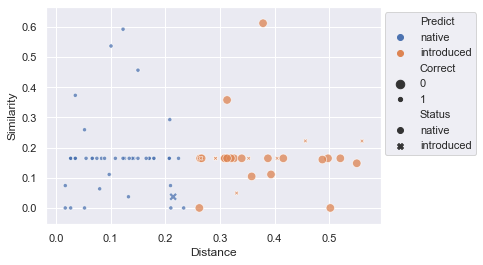

In [135]:
viz = sns.scatterplot(
    data=known,
    x="Distance",
    y="Similarity",
    hue="Predict",
    style="Status",
    size="Correct",
    alpha=0.75
)
viz.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

In [142]:
nerr = known[(known["Status"] == "native") & (known["Correct"] == 0)].shape[0] / known[known["Status"] == "native"].shape[0] * 100
ierr = known[(known["Status"] == "introduced") & (known["Correct"] == 0)].shape[0] / known[known["Status"] == "introduced"].shape[0] * 100

print("Percent of Native mislabled to Introduced: {:.2f}%".format(nerr))
print("Percent of Introduced mislabled to Native: {:.2f}%".format(ierr))

Percent of Native mislabled to Introduced: 31.25%
Percent of Introduced mislabled to Native: 11.11%
